# Analysis of Titanic passenger data

The following documentation of the raw data is provided at https://www.kaggle.com/c/titanic/data

=============================================================

VARIABLE DESCRIPTIONS:

- survival        Survival
                (0 = No; 1 = Yes)
- pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
- name            Name
- sex             Sex
- age             Age
- sibsp           Number of Siblings/Spouses Aboard
- parch           Number of Parents/Children Aboard
- ticket          Ticket Number
- fare            Passenger Fare
- cabin           Cabin
- embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

– Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
– Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
– Parent:   Mother or Father of Passenger Aboard Titanic
– Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.


In [16]:
import pandas as pd
data= pd.read_csv("titanic_data.csv")
print (data.shape)
data.head().transpose()

(891, 12)


,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [18]:
import numpy as np

def convert_sex_to_int(s):
    if s == '' or s == ' ':
        print ("sex undefined, was blank or empty")
        return 0
    if s == 'male' or s == 0:
        return 0
    if s == 'female' or s == 1:
        return 1
    else:
        print ("sex undefined, was an undefined string")
        return 1

def convert_age_to_int(a, survived):
    if a == '' or a == ' ' or np.isnan(a): # isnan <=> is NaN, is not a no.
        #print ("age either empty or undefined")
        convert_age_to_int.countProblems += 1
        if (survived == 0):
                    convert_age_to_int.countNotSurvived += 1
        return 999
    else:
        return int(a)

def convert_fare_to_float(f):
    if f == '' or f == ' ' or np.isnan(f):
        print ('fare not defined')
        return 0.0
    else:
        return float(f)

def convert_embarked_to_int(e):
    if e == '' or e == ' ':
        print ('embarked not defined')
        return 0
    elif e == 'C':
        return 1
    elif e == 'Q':
        return 2
    elif e == 'S':
        return 3
    else:
        print ("embarked not correctly defined")
        return 0  

convert_age_to_int.countProblems= 0
convert_age_to_int.countNotSurvived= 0
for index, rec in data.iterrows():
    data['Sex'][index]= convert_sex_to_int(data['Sex'][index])
    data['Age'][index]= convert_age_to_int(data['Age'][index], data['Survived'][index])
    data['Fare'][index]= convert_fare_to_float(data['Fare'][index])
    data['Embarked'][index]= convert_embarked_to_int(data['Embarked'][index])
print ('age column, no of problems:' + str(convert_age_to_int.countProblems))
print ('   no of passengers with undefined age who did not survive:' + str(convert_age_to_int.countNotSurvived))

#print (data['Sex'])
#print (data['Age'])
#print (data['Fare'])
#print (data['Embarked'])

/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set o

embarked not correctly defined
embarked not correctly defined
age column, no of problems:177
   no of passengers with undefined age who did not survive:125


## plotting correlations does NOT make sense in case of a classification problem (survived/not survived)

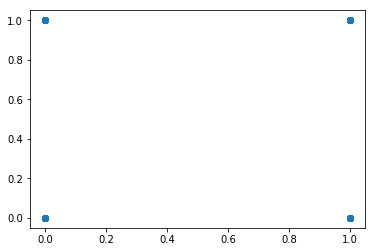

In [21]:
import matplotlib.pyplot as plt
x_Sex= data['Sex']
y= data['Survived']
plt.plot(x_Sex, y, 'o')

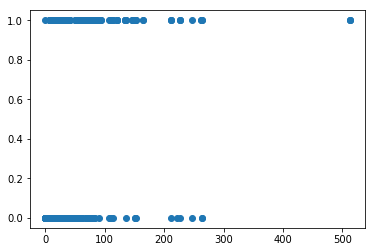

In [22]:
import matplotlib.pyplot as plt
x_Fare= data['Fare']
#y= data['Survived']
plt.plot(x_Fare, y, 'o')

## in this case study we use a CLASSIFIER instead of a Regressor as in the Bosoton house price example

In [24]:
data.head().transpose()

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,0,1,1,1,0
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(max_depth = 10)
X= data.drop(columns= ['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
classifier.fit(X, y)
classifier.score(X, y)

/Users/pree/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9371492704826038

X (features): Pclass, Sex, Age, Fare, Embarked

In [27]:
classifier.feature_importances_

array([0.09743497, 0.31503001, 0.25773336, 0.29400659, 0.03579507])

## ============================================

In [1]:
import pandas as pd
data= pd.read_csv("titanic_data.csv")
print (data.shape)
data.head().transpose()

(891, 12)


,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


# remove passenger data where age is undefined (0)

In [2]:
import numpy as np

def convert_sex_to_int(s):
    if s == '' or s == ' ':
        print ("sex undefined, was blank or empty")
        return 0
    if s == 'male' or s == 0:
        return 0
    if s == 'female' or s == 1:
        return 1
    else:
        print ("sex undefined, was an undefined string")
        return 1

def convert_age_to_int(a, survived):
    if a == '' or a == ' ' or np.isnan(a): # isnan <=> is NaN, is not a no.
        #print ("age either empty or undefined")
        convert_age_to_int.countProblems += 1
        if (survived == 0):
                    convert_age_to_int.countNotSurvived += 1
        return 999
    else:
        return int(a)

def convert_fare_to_float(f):
    if f == '' or f == ' ' or np.isnan(f):
        print ('fare not defined')
        return 0.0
    else:
        return float(f)

def convert_embarked_to_int(e):
    if e == '' or e == ' ':
        print ('embarked not defined')
        return 0
    elif e == 'C':
        return 1
    elif e == 'Q':
        return 2
    elif e == 'S':
        return 3
    else:
        print ("embarked not correctly defined")
        return 0  

convert_age_to_int.countProblems= 0
convert_age_to_int.countNotSurvived= 0
indicesOfRecsToBeRemoved= []
for index, rec in data.iterrows():
    data['Sex'][index]= convert_sex_to_int(data['Sex'][index])
    data['Age'][index]= convert_age_to_int(data['Age'][index], data['Survived'][index])
    data['Fare'][index]= convert_fare_to_float(data['Fare'][index])
    data['Embarked'][index]= convert_embarked_to_int(data['Embarked'][index])
    if data['Age'][index] == 999.0:
        indicesOfRecsToBeRemoved.append(index)
print (indicesOfRecsToBeRemoved)
data= data.drop(data.index[indicesOfRecsToBeRemoved])
print (data.shape)
print ('age column, no of problems:' + str(convert_age_to_int.countProblems))
print ('   no of passengers with undefined age who did not survive:' + str(convert_age_to_int.countNotSurvived))

#print (data['Sex'])
#print (data['Age'])
#print (data['Fare'])
#print (data['Embarked'])

/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pree/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set o

embarked not correctly defined
embarked not correctly defined
[5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]
(714, 12)
age column, no of problems:177
   no of passengers with undefined

In [3]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(max_depth = 10)
X= data.drop(columns= ['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
y= data['Survived']
classifier.fit(X, y)
classifier.score(X, y)

/Users/pree/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9425770308123249

In [4]:
classifier.feature_importances_

array([0.13169805, 0.26369852, 0.30121763, 0.27151937, 0.03186642])

X (features): Pclass, Sex, Age, Fare, Embarked

In [5]:
i= 0
noOfWronglyClassified= 0
for index, rec in data.iterrows():
    predSurvived= classifier.predict([[data['Pclass'][index], data['Sex'][index], data['Age'][index], data['Fare'][index], data['Embarked'][index]]])[0]
    if predSurvived != data['Survived'][index]:
        noOfWronglyClassified+= 1
    i+= 1
print (100*(1-float(noOfWronglyClassified/i)))
print (i)

94.25770308123249
714
